In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder #for train test splitting
from sklearn.model_selection import train_test_split #for decision tree object
from sklearn.ensemble import RandomForestClassifier #for checking testing results
from sklearn.metrics import classification_report, confusion_matrix #for visualizing tree 
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [2]:
dataset = pd.read_csv('Crop_recommendation.csv') # to import the dataset into a variable
# Splitting the attributes into independent and dependent attributes
X = dataset.iloc[:, :-1].values # attributes to determine dependent variable / Class
Y = dataset.iloc[:, -1].values # dependent variable / Class

In [3]:
# Splitting the data - 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X , Y, test_size = 0.2, random_state = 42)
print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)

Training split input-  (1760, 7)
Testing split input-  (440, 7)


In [4]:
rforest = RandomForestClassifier()
rforest.fit(X_train,y_train)
print('Random Forest Classifier Created')

Random Forest Classifier Created


In [5]:
# Predicting the values of test data
y_pred = rforest.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
 

Text(0.5, 1.0, 'Accuracy Score: 0.9931818181818182')

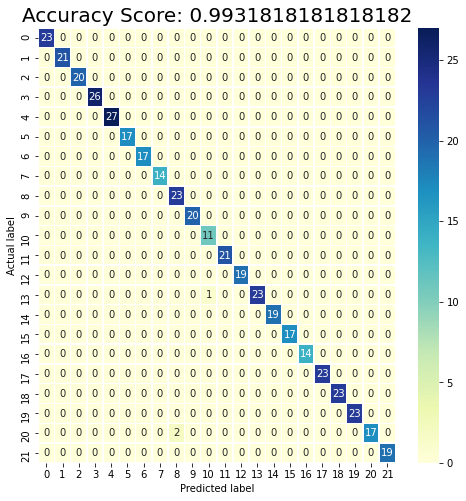

In [6]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,8))
sns.heatmap(data=cm,linewidths=.5, annot = True, cmap = 'YlGnBu',fmt = 'g')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(rforest.score(X_test, y_test))
plt.title(all_sample_title, size = 20)

In [7]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(rforest, X, Y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.995 (0.004)
